In [79]:
import pandas as pd
import nltk

In [80]:
# ambil rule probabilistic
df = pd.read_csv("rules/probabilistic_rules.csv")
df

,production,lhs,sum_production,sum_lhs,probability
0,Adj -> 'ageng',Adj,1,32,0.031250
1,Adj -> 'bajang',Adj,1,32,0.031250
2,Adj -> 'barak',Adj,1,32,0.031250
3,Adj -> 'belog',Adj,3,32,0.093750
4,Adj -> 'beneh',Adj,1,32,0.031250
...,...,...,...,...,...
1361,Verb -> 'tadah',Verb,1,147,0.006803
1362,Verb -> 'tamak',Verb,1,147,0.006803
1363,Verb -> 'tandruh',Verb,1,147,0.006803
1364,Verb -> 'tengkejutningeh',Verb,1,147,0.006803


In [81]:
# tulis rule cfg
# grammar_cfg = ""
# for prod in df["production"]:
#   grammar_cfg += f"{prod}\n"
# grammar_cfg = nltk.CFG.fromstring(grammar_cfg)
# grammar_cfg._start = nltk.Nonterminal("K")
# parser_cfg = nltk.ChartParser(grammar_cfg)

In [82]:
# tulis rule pcfg
grammar_pcfg = ""
for prod, prob in zip(df["production"], df["probability"]):
  grammar_pcfg += f"{prod} [{prob}]\n"
grammar_pcfg = nltk.PCFG.fromstring(grammar_pcfg)
grammar_pcfg._start = nltk.Nonterminal("K")
parser_pcfg = nltk.ViterbiParser(grammar_pcfg)

In [83]:
# tulis kalimat
# sentence = input("Enter your Balinese sentence: ")
sentence = "meme baanga baas"
sentence = sentence.lower().split()

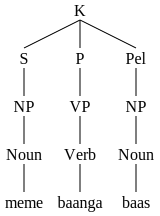

In [84]:
try:
    for tree in parser_pcfg.parse(sentence):
        display(tree)
except Exception as e:
    print(e)